# K-Min-Sum-Radii LP proof of concept

The goal is to find the optimal solution to a linear program that calculates a k-msr solution to a given selection of points and an integer k. Gurobi is used to calculate the solution within the necessary constraints. This notebook is supposed to be an exercise to find these specific constraints and to improve my grasp on the problem itself, before proceeding with implementing an algorithm of my own.

In [1]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import DistanceMetric
from scipy.spatial import distance as dist

We need data points to perform the clustering on. An easy stand-in for actual data are sklearn blobs, that form very obvious clusters and are verifiable by hand if they are small enough.

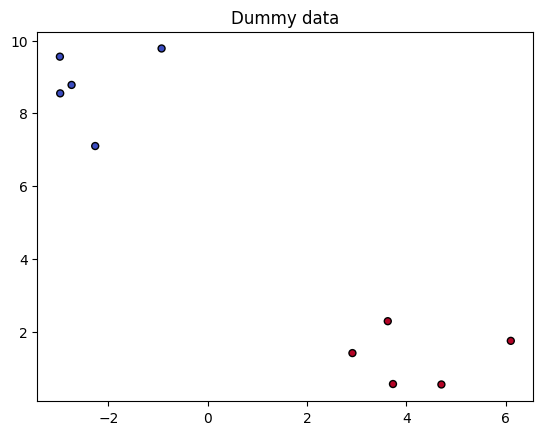

In [2]:
# generate dummy data for k=2
k = 2
points, cluster_membership = make_blobs(
    n_samples=10,
    n_features=2,
    centers=k,
    random_state=42
)

plt.title("Dummy data")
plt.scatter(points[:, 0], points[:, 1], marker='o', c=cluster_membership, s=25, edgecolor="k", cmap="coolwarm")
plt.show()

In [3]:
points

array([[ 2.914961  ,  1.41088215],
       [-2.97261532,  8.54855637],
       [-0.92998481,  9.78172086],
       [ 3.62704772,  2.28741702],
       [-2.743351  ,  8.78014917],
       [ 3.73185476,  0.56086598],
       [ 4.70740704,  0.5484215 ],
       [-2.26723535,  7.10100588],
       [-2.97867201,  9.55684617],
       [ 6.10552761,  1.74739338]])

In [4]:
# distance function
distances = DistanceMetric.get_metric('euclidean')

# we need all distances as possible radii
radii = distances.pairwise(points)
radii


array([[ 0.        ,  9.25256441,  9.21165289,  1.12932761,  9.29099516,
         1.17891599,  1.98914584,  7.69627618, 10.05443384,  3.20826356],
       [ 9.25256441,  0.        ,  2.38600797,  9.09711043,  0.32587935,
        10.42847625, 11.08985579,  1.61026809,  1.00830799, 11.34321369],
       [ 9.21165289,  2.38600797,  0.        ,  8.77103959,  2.07157978,
        10.33232369, 10.81822554,  2.99574228,  2.06099196, 10.67936575],
       [ 1.12932761,  9.09711043,  8.77103959,  0.        ,  9.09601839,
         1.72972917,  2.047262  ,  7.61007297,  9.82243011,  2.53662928],
       [ 9.29099516,  0.32587935,  2.07157978,  9.09601839,  0.        ,
        10.46350351, 11.10293366,  1.74533902,  0.81156282, 11.30319895],
       [ 1.17891599, 10.42847625, 10.33232369,  1.72972917, 10.46350351,
         0.        ,  0.97563165,  8.87482462, 11.22313811,  2.65370873],
       [ 1.98914584, 11.08985579, 10.81822554,  2.047262  , 11.10293366,
         0.97563165,  0.        ,  9.56984841

In [5]:
# pre-processing by which center-radius combinations a point would be covered  
Y =[]
for k in range(len(points)):       
    Y.append([])
    for i in range(len(points)):
        Y[k].append([])
        for j in range(len(points)):
            if (dist.euclidean(points[k], points[j]) <= radii[i][j]):                 
                Y[k][i].append(1)
            else:
                Y[k][i].append(0)
Y

[[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
  [1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
  [1, 1, 1, 1, 1, 0, 0, 1, 1, 0],
  [1, 1, 1, 1, 1, 0, 0, 1, 1, 0],
  [1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
  [1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
  [1, 1, 1, 1, 1, 1, 0, 1, 1, 0]],
 [[0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
  [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
  [1, 1, 0, 0, 0, 1, 1, 1, 0, 0],
  [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
  [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
  [0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
  [1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
  [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]],
 [[0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
  [1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
  [1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
  [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
  [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
  [1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
  [0, 1, 1, 

## Defining the ILP

In [6]:
# model
m = gp.Model("kmsr")

# variables
y = m.addVars(len(radii), len(radii), vtype=GRB.BINARY, name="Y") # for dummies (me): adds a 10 10x10 grids of binary variables y_ij that can be either 0 or 1, which will be used to check which clusters overlap a given point
l =  m.addVars(len(points), vtype=GRB.BINARY, name="L") # helper variable that marks the currently open centers or locations, to make sure we minimize the objective for a singular row (so one center assignment) instead of for every single point, which would lead to every y_ij being 1
y, l

Set parameter Username
Set parameter LicenseID to value 2629995
Academic license - for non-commercial use only - expires 2026-03-01


({(0, 0): <gurobi.Var *Awaiting Model Update*>,
  (0, 1): <gurobi.Var *Awaiting Model Update*>,
  (0, 2): <gurobi.Var *Awaiting Model Update*>,
  (0, 3): <gurobi.Var *Awaiting Model Update*>,
  (0, 4): <gurobi.Var *Awaiting Model Update*>,
  (0, 5): <gurobi.Var *Awaiting Model Update*>,
  (0, 6): <gurobi.Var *Awaiting Model Update*>,
  (0, 7): <gurobi.Var *Awaiting Model Update*>,
  (0, 8): <gurobi.Var *Awaiting Model Update*>,
  (0, 9): <gurobi.Var *Awaiting Model Update*>,
  (1, 0): <gurobi.Var *Awaiting Model Update*>,
  (1, 1): <gurobi.Var *Awaiting Model Update*>,
  (1, 2): <gurobi.Var *Awaiting Model Update*>,
  (1, 3): <gurobi.Var *Awaiting Model Update*>,
  (1, 4): <gurobi.Var *Awaiting Model Update*>,
  (1, 5): <gurobi.Var *Awaiting Model Update*>,
  (1, 6): <gurobi.Var *Awaiting Model Update*>,
  (1, 7): <gurobi.Var *Awaiting Model Update*>,
  (1, 8): <gurobi.Var *Awaiting Model Update*>,
  (1, 9): <gurobi.Var *Awaiting Model Update*>,
  (2, 0): <gurobi.Var *Awaiting Model Up

In [7]:
# objective:
m.setObjective(gp.quicksum([y[i, j] * radii[i,j] for i in range(len(radii)) for j in range(len(radii))]),  GRB.MINIMIZE)

In [8]:
print(y.keys)

<bound method tupledict.keys of {(0, 0): <gurobi.Var *Awaiting Model Update*>, (0, 1): <gurobi.Var *Awaiting Model Update*>, (0, 2): <gurobi.Var *Awaiting Model Update*>, (0, 3): <gurobi.Var *Awaiting Model Update*>, (0, 4): <gurobi.Var *Awaiting Model Update*>, (0, 5): <gurobi.Var *Awaiting Model Update*>, (0, 6): <gurobi.Var *Awaiting Model Update*>, (0, 7): <gurobi.Var *Awaiting Model Update*>, (0, 8): <gurobi.Var *Awaiting Model Update*>, (0, 9): <gurobi.Var *Awaiting Model Update*>, (1, 0): <gurobi.Var *Awaiting Model Update*>, (1, 1): <gurobi.Var *Awaiting Model Update*>, (1, 2): <gurobi.Var *Awaiting Model Update*>, (1, 3): <gurobi.Var *Awaiting Model Update*>, (1, 4): <gurobi.Var *Awaiting Model Update*>, (1, 5): <gurobi.Var *Awaiting Model Update*>, (1, 6): <gurobi.Var *Awaiting Model Update*>, (1, 7): <gurobi.Var *Awaiting Model Update*>, (1, 8): <gurobi.Var *Awaiting Model Update*>, (1, 9): <gurobi.Var *Awaiting Model Update*>, (2, 0): <gurobi.Var *Awaiting Model Update*>, (

In [9]:
# constraints:

# every point is covered by atleast one center/radius y_ij
for i in range(len(points)):
    m.addConstr(gp.quicksum([y[i, j] for j in range(len(points))]) >= 1)

# y[i,j] can only be 1 if center j is open
for i in range(len(points)):
    for j in range(len(points)):
        m.addConstr(y[i, j] <= l[j])  # If z[j] is 0, y[i,j] must be 0

# exactly k centers open in total (not per row of y, so we don't get the sum of 10 different solutions)
m.addConstr(gp.quicksum([l[i] for i in range(len(points))]) == k, "select_k_Centers")

<gurobi.Constr *Awaiting Model Update*>

In [10]:
# do the thing
m.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: AMD Ryzen 7 5800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 111 rows, 110 columns and 310 nonzeros
Model fingerprint: 0x8df22b12
Variable types: 0 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 53.1144222
Presolve removed 10 rows and 10 columns
Presolve time: 0.00s
Presolved: 101 rows, 100 columns, 290 nonzeros
Variable types: 0 continuous, 100 integer (100 binary)
Found heuristic solution: objective 9.9380243

Root relaxation: objective 3.258794e-01, 11 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf

In [11]:
m.display()

Minimize
9.252564411486777 Y[0,1] + 9.211652885195841 Y[0,2] + 1.1293276095427889 Y[0,3]
+ 9.290995160230224 Y[0,4] + 1.1789159864189187 Y[0,5] + 1.9891458420897201 Y[0,6]
+ 7.6962761848431205 Y[0,7] + 10.054433840652383 Y[0,8] + 3.2082635560794674 Y[0,9]
+ 9.252564411486777 Y[1,0] + 2.386007970432814 Y[1,2] + 9.09711043102228 Y[1,3]
+ 0.3258793503670385 Y[1,4] + 10.428476245667978 Y[1,5] + 11.089855790282579 Y[1,6]
+ 1.6102680889822019 Y[1,7] + 1.0083079879584977 Y[1,8] + 11.343213694843513 Y[1,9]
+ 9.211652885195841 Y[2,0] + 2.386007970432814 Y[2,1] + 8.771039589361056 Y[2,3]
+ 2.0715797793648414 Y[2,4] + 10.332323687401857 Y[2,5] + 10.818225543846411 Y[2,6]
+ 2.9957422766460393 Y[2,7] + 2.06099196348809 Y[2,8] + 10.67936575209419 Y[2,9]
+ 1.1293276095427889 Y[3,0] + 9.09711043102228 Y[3,1] + 8.771039589361056 Y[3,2]
+ 9.096018392899788 Y[3,4] + 1.7297291664908652 Y[3,5] + 2.0472619973026385 Y[3,6]
+ 7.610072973300392 Y[3,7] + 9.822430113106464 Y[3,8] + 2.536629276369174 Y[3,9]
+ 9.2

C:\Users\Mattis\AppData\Local\Temp\ipykernel_9400\137993151.py:1: DeprecationWarning: Model.display() is deprecated
  m.display()


In [12]:
for v in m.getVars():
        if v.x != 0:
            print(v.varName, "=", v.x)

Y[0,0] = 1.0
Y[1,4] = 1.0
Y[2,2] = 1.0
Y[3,3] = 1.0
Y[4,4] = 1.0
Y[5,5] = 1.0
Y[6,6] = 1.0
Y[7,7] = 1.0
Y[8,8] = 1.0
Y[9,9] = 1.0
L[0] = 1.0
L[2] = 1.0
L[3] = 1.0
L[4] = 1.0
L[5] = 1.0
L[6] = 1.0
L[7] = 1.0
L[8] = 1.0
L[9] = 1.0


In [14]:
final_centers = [points[i] for i in range(len(radii)) if l[i].x == 1]
final_radii = [radii[i][j] for i in range(len(radii)) for j in range(len(radii)) if y[i, j].x == 1]

print("Optimal centers:")
for i in range(len(final_centers)): 
    print(f"Center at point {final_centers[i]} with radius {final_radii[i]}")

Optimal centers:
Center at point [2.914961   1.41088215] with radius 0.0
Center at point [-0.92998481  9.78172086] with radius 0.3258793503670385
Center at point [3.62704772 2.28741702] with radius 0.0
Center at point [-2.743351    8.78014917] with radius 0.0
Center at point [3.73185476 0.56086598] with radius 0.0
Center at point [4.70740704 0.5484215 ] with radius 0.0
Center at point [-2.26723535  7.10100588] with radius 0.0
Center at point [-2.97867201  9.55684617] with radius 0.0
Center at point [6.10552761 1.74739338] with radius 0.0


# Visual Solution

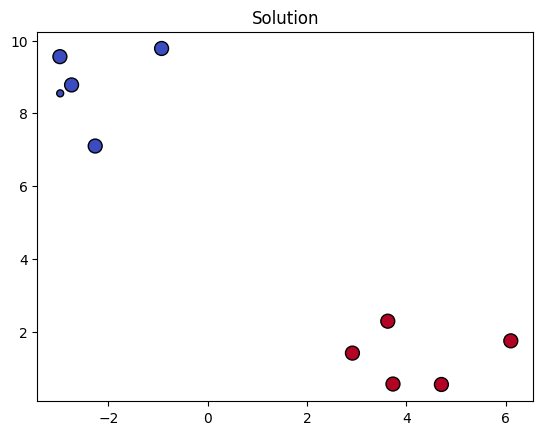

In [15]:
# centers are enlarged
plt.title("Solution")
sizes = [100 if tuple(point) in map(tuple, final_centers) else 25 for point in points]
plt.scatter(points[:, 0], points[:, 1], marker='o', c=cluster_membership, s=sizes, edgecolor="k", cmap="coolwarm")
plt.show()